<a href="https://colab.research.google.com/github/nikhillcodes/MyProgrammingPortfolio/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

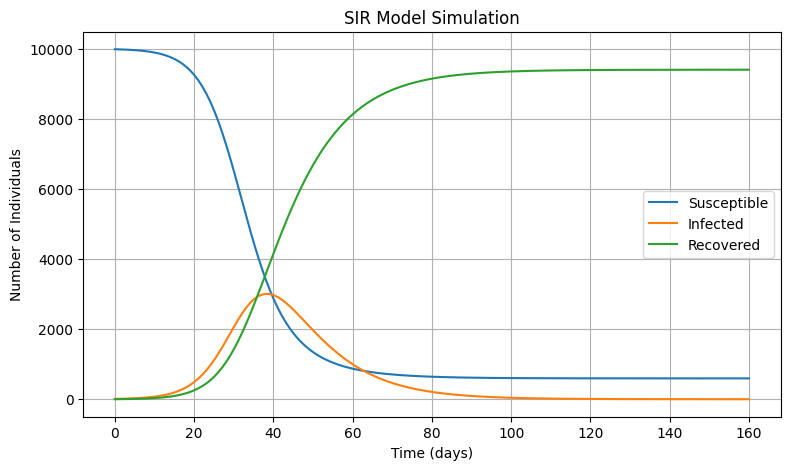

In [1]:
# -----------------------------------------------
# Simple SIR Epidemiological Model in Python
# Fully commented for understanding and viva
# -----------------------------------------------

# Importing required libraries
import numpy as np                 # NumPy helps with numerical calculations
import matplotlib.pyplot as plt    # Matplotlib is used for plotting graphs
from scipy.integrate import odeint # odeint solves differential equations for us

# -----------------------------------------------
# PARAMETERS (YOU CAN CHANGE THESE FOR NEW GRAPHS)
# -----------------------------------------------

beta = 0.3      # Infection rate (how fast the disease spreads)
gamma = 0.1     # Recovery rate (how fast infected people recover)
N = 10000       # Total population
I0 = 10         # Initial number of infected individuals
R0 = 0          # Initial number of recovered individuals
S0 = N - I0 - R0 # Initial number of susceptible individuals (healthy people)

# -----------------------------------------------
# SIR MODEL DIFFERENTIAL EQUATIONS
# -----------------------------------------------

# This function defines how S, I, and R change with respect to time
def sir_model(y, t, beta, gamma, N):
    S, I, R = y  # Unpack values: y contains [S, I, R]

    # Differential equation for Susceptible population
    dSdt = -beta * S * I / N

    # Differential equation for Infected population
    dIdt = beta * S * I / N - gamma * I

    # Differential equation for Recovered population
    dRdt = gamma * I

    # Return the rates of change
    return [dSdt, dIdt, dRdt]

# -----------------------------------------------
# TIME RANGE FOR SIMULATION
# -----------------------------------------------

t = np.linspace(0, 160, 160)  # Simulate for 160 days (0 to 160)

# Initial values for S, I, R
initial_values = [S0, I0, R0]

# -----------------------------------------------
# SOLVING THE DIFFERENTIAL EQUATIONS USING ODEINT
# -----------------------------------------------

solution = odeint(sir_model, initial_values, t, args=(beta, gamma, N))

# odeint returns a 2D array → we extract S, I, R separately
S, I, R = solution.T

# -----------------------------------------------
# PLOTTING THE RESULTS
# -----------------------------------------------

plt.figure(figsize=(9,5))  # Set graph size

plt.plot(t, S, label="Susceptible")  # Plot S(t)
plt.plot(t, I, label="Infected")     # Plot I(t)
plt.plot(t, R, label="Recovered")    # Plot R(t)

# Labels and title
plt.xlabel("Time (days)")
plt.ylabel("Number of Individuals")
plt.title("SIR Model Simulation")

plt.legend()    # Show labels for each curve
plt.grid(True)  # Add grid for clarity
plt.show()      # Display the final graph
